In [ ]:
import pandas as pd
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline
import scipy
from scipy import integrate
import pandas as pd

In [ ]:
import pandas as pd

# Load the CSV file to understand its structure and the data it contains
df = pd.read_csv('/content/sample_data/datacsv/Empirical_evaluation_Sheet3.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,Loss Function,Epochs,Batch Size,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training loss,neptune log id
0,L2,50,4,18.044,11.071,26.361,22.711,35.850,50.595,74.355,81.997,0.04690,UN105
1,AL,50,4,17.601,9.890,26.717,26.294,40.063,54.545,75.772,82.470,0.21861,UN96
2,WCLL,50,4,17.551,9.812,26.740,26.752,40.475,54.786,75.889,82.523,0.21327,UN111
3,WNLL,50,4,17.682,10.039,26.705,25.929,39.501,54.057,75.519,82.325,0.21400,UN223
4,NLL_vMF,50,4,17.785,10.279,26.509,25.389,38.853,53.185,74.801,81.852,-2.93435,UN92


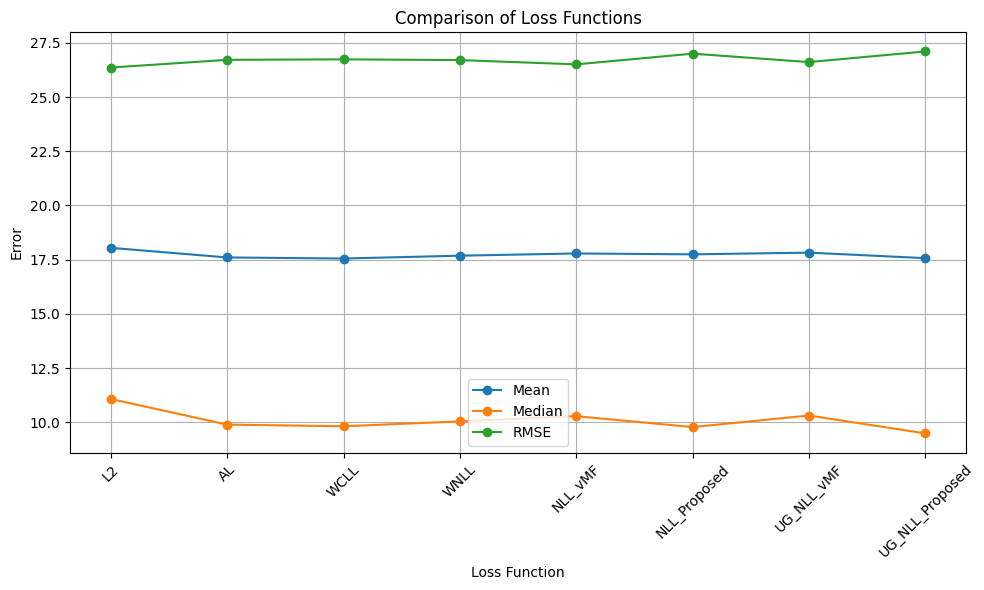

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/datacsv/Empirical_evaluation_Sheet3.csv')
# Plotting function
def plot_comparison(x, ys, labels, ylabel, title):
    plt.figure(figsize=(10, 6))
    for y, label in zip(ys, labels):
        plt.plot(x, df[y], label=label, marker='o')
    plt.xlabel('Loss Function')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Columns to compare
metrics = ['Mean', 'Median', 'RMSE']
loss_functions = df['Loss Function']

# Plotting
plot_comparison(loss_functions, metrics, metrics, 'Error', 'Comparison of Loss Functions')


In [ ]:
# Correctly loading the CSV files with appropriate column names
columns = ['Epoch', 'Timestamp', 'Value']

al_a1 = pd.read_csv('/content/sample_data/datacsv/AL_a1.csv', header=None, names=columns)
al_a2 = pd.read_csv('/content/sample_data/datacsv/AL_a2.csv', header=None, names=columns)
al_a3 = pd.read_csv('/content/sample_data/datacsv/AL_a3.csv', header=None, names=columns)
al_a4 = pd.read_csv('/content/sample_data/datacsv/AL_a4.csv', header=None, names=columns)
al_a5 = pd.read_csv('/content/sample_data/datacsv/AL_a5.csv', header=None, names=columns)
al_loss = pd.read_csv('/content/sample_data/datacsv/AL_loss.csv', header=None, names=columns)
al_mean = pd.read_csv('/content/sample_data/datacsv/AL_mean.csv', header=None, names=columns)
al_median = pd.read_csv('/content/sample_data/datacsv/AL_median.csv', header=None, names=columns)
al_rmse = pd.read_csv('/content/sample_data/datacsv/AL_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame
al_combined_corrected = pd.DataFrame({
    'Epoch': al_mean['Epoch'],
    'Mean': al_mean['Value'],
    'Median': al_median['Value'],
    'RMSE': al_rmse['Value'],
    '5.0°': al_a1['Value'],
    '7.5°': al_a2['Value'],
    '11.25°': al_a3['Value'],
    '22.5°': al_a4['Value'],
    '30°': al_a5['Value'],
    'Training Loss': al_loss['Value']
})

# Display the corrected combined DataFrame
al_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.484015,15.716314,30.548874,14.052976,24.268183,37.603422,64.165922,74.868990,1.968759
1,1.0,19.557169,12.519597,27.776030,19.277669,31.683805,46.032665,71.176381,79.701561,1.931823
2,2.0,19.474760,12.292697,27.878995,18.676339,31.675632,46.687050,71.965906,80.209408,1.884306
3,3.0,18.638124,11.612792,27.155908,21.149640,33.628489,48.738570,73.961341,81.612252,1.792864
4,4.0,18.242249,11.016940,26.786045,22.253778,35.772686,50.771567,74.415669,81.877521,1.870229


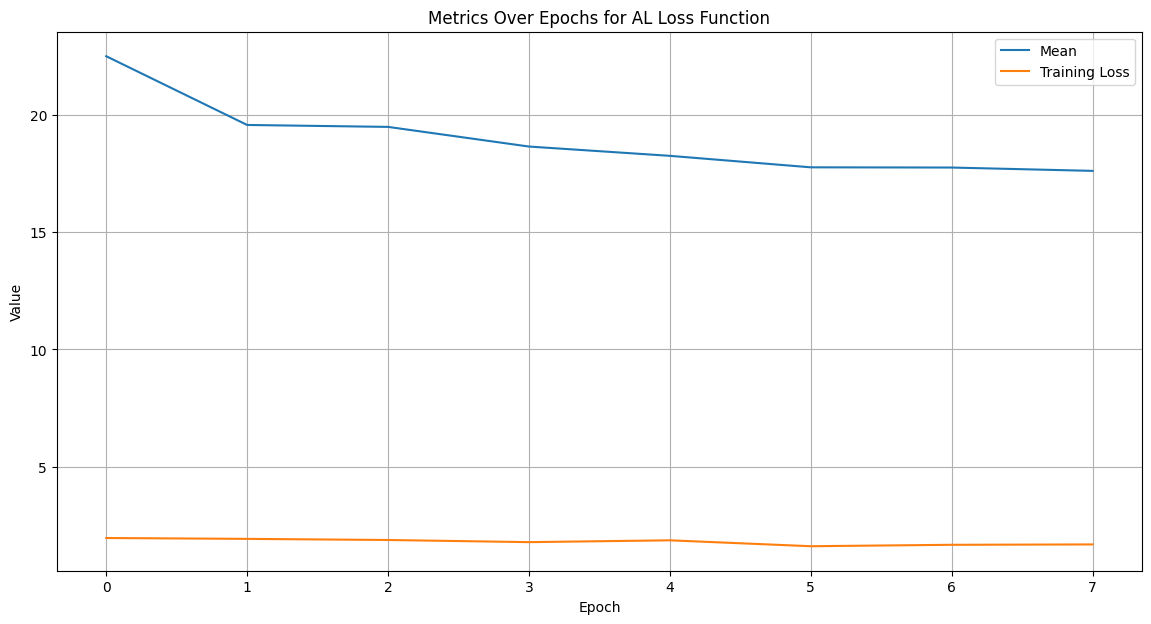

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics_over_epochs(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for AL Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example plotting mean and training loss over epochs
plot_metrics_over_epochs(al_combined_corrected, ['Mean', 'Training Loss'])



In [ ]:
# Correctly loading the CSV files for the L2 loss function with appropriate column names
l2_a1 = pd.read_csv('/content/sample_data/datacsv/L2_a1.csv', header=None, names=columns)
l2_a2 = pd.read_csv('/content/sample_data/datacsv/L2_a2.csv', header=None, names=columns)
l2_a3 = pd.read_csv('/content/sample_data/datacsv/L2_a3.csv', header=None, names=columns)
l2_a4 = pd.read_csv('/content/sample_data/datacsv/L2_a4.csv', header=None, names=columns)
l2_a5 = pd.read_csv('/content/sample_data/datacsv/L2_a5.csv', header=None, names=columns)
l2_loss = pd.read_csv('/content/sample_data/datacsv/L2_loss.csv', header=None, names=columns)
l2_mean = pd.read_csv('/content/sample_data/datacsv/L2_mean.csv', header=None, names=columns)
l2_median = pd.read_csv('/content/sample_data/datacsv/L2_median.csv', header=None, names=columns)
l2_rmse = pd.read_csv('/content/sample_data/datacsv/L2_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the L2 loss function
l2_combined_corrected = pd.DataFrame({
    'Epoch': l2_mean['Epoch'],
    'Mean': l2_mean['Value'],
    'Median': l2_median['Value'],
    'RMSE': l2_rmse['Value'],
    '5.0°': l2_a1['Value'],
    '7.5°': l2_a2['Value'],
    '11.25°': l2_a3['Value'],
    '22.5°': l2_a4['Value'],
    '30°': l2_a5['Value'],
    'Training Loss': l2_loss['Value']
})

# Display the corrected combined DataFrame for L2
l2_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.172247,15.899272,29.309628,10.488689,20.530964,35.414487,64.340402,75.314061,1.486178
1,1.0,20.451727,14.389544,27.705711,15.082314,25.978327,40.182436,68.003644,78.206300,1.689941
2,2.0,18.977133,12.236301,26.812091,19.029411,31.720527,46.803480,71.992533,80.553063,1.160133
3,3.0,18.580048,11.797354,26.594222,20.137201,32.948995,48.166747,73.174381,81.258450,1.253264
4,4.0,18.645744,12.007448,26.649806,20.045997,32.537415,47.473719,73.005006,81.343745,1.007972


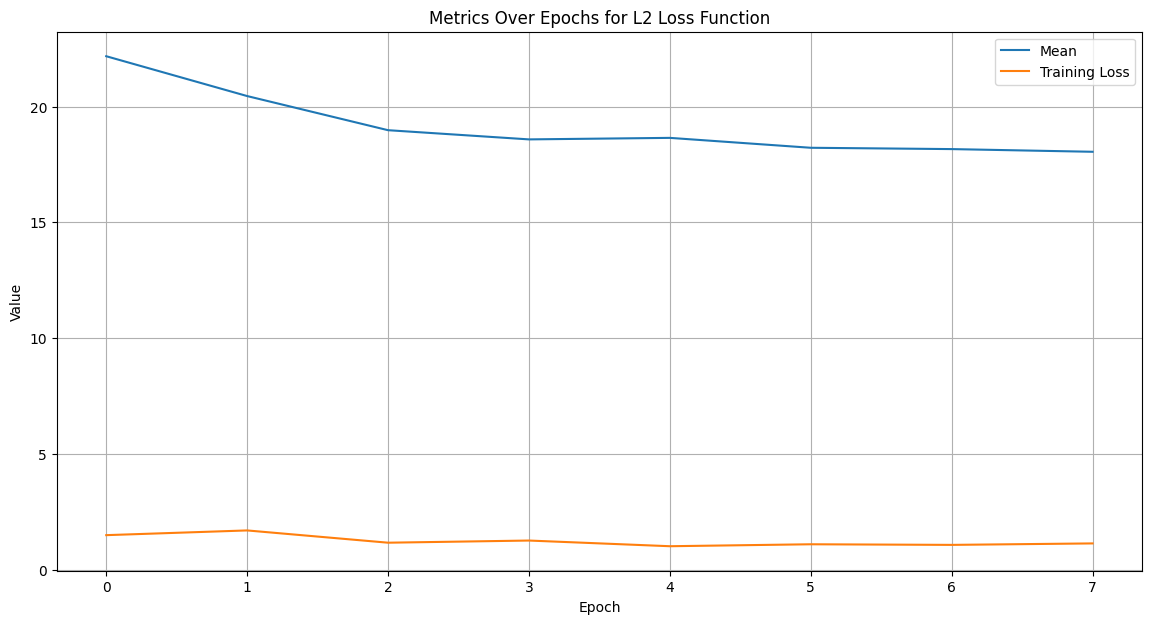

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics_over_epochs_l2(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for L2 Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting mean and training loss over epochs for L2
plot_metrics_over_epochs_l2(l2_combined_corrected, ['Mean', 'Training Loss'])


In [ ]:
# Correctly loading the CSV files for the NLL_Proposed loss function with appropriate column names
nll_proposed_a1 = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_a1.csv', header=None, names=columns)
nll_proposed_a2 = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_a2.csv', header=None, names=columns)
nll_proposed_a3 = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_a3.csv', header=None, names=columns)
nll_proposed_a4 = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_a4.csv', header=None, names=columns)
nll_proposed_a5 = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_a5.csv', header=None, names=columns)
nll_proposed_loss = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_loss.csv', header=None, names=columns)
nll_proposed_mean = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_mean.csv', header=None, names=columns)
nll_proposed_median = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_median.csv', header=None, names=columns)
nll_proposed_rmse = pd.read_csv('/content/sample_data/datacsv/NLL_Proposed_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the NLL_Proposed loss function
nll_proposed_combined_corrected = pd.DataFrame({
    'Epoch': nll_proposed_mean['Epoch'],
    'Mean': nll_proposed_mean['Value'],
    'Median': nll_proposed_median['Value'],
    'RMSE': nll_proposed_rmse['Value'],
    '5.0°': nll_proposed_a1['Value'],
    '7.5°': nll_proposed_a2['Value'],
    '11.25°': nll_proposed_a3['Value'],
    '22.5°': nll_proposed_a4['Value'],
    '30°': nll_proposed_a5['Value'],
    'Training Loss': nll_proposed_loss['Value']
})

# Display the corrected combined DataFrame for NLL_Proposed
nll_proposed_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.428915,15.257559,30.480375,12.907073,23.820807,38.276790,64.811282,74.856148,1.189081
1,1.0,20.397743,13.429764,28.533506,17.449603,28.789832,43.094123,69.465249,78.399233,1.113275
2,2.0,18.804434,11.026892,27.731666,23.722109,36.552179,50.716122,73.020656,80.375605,1.039583
3,3.0,18.603979,11.295693,27.107787,20.921673,34.498952,49.844317,73.952604,81.346498,1.052578
4,4.0,18.304192,10.779046,27.020537,22.781460,36.474487,51.607252,74.347871,81.525613,0.991706


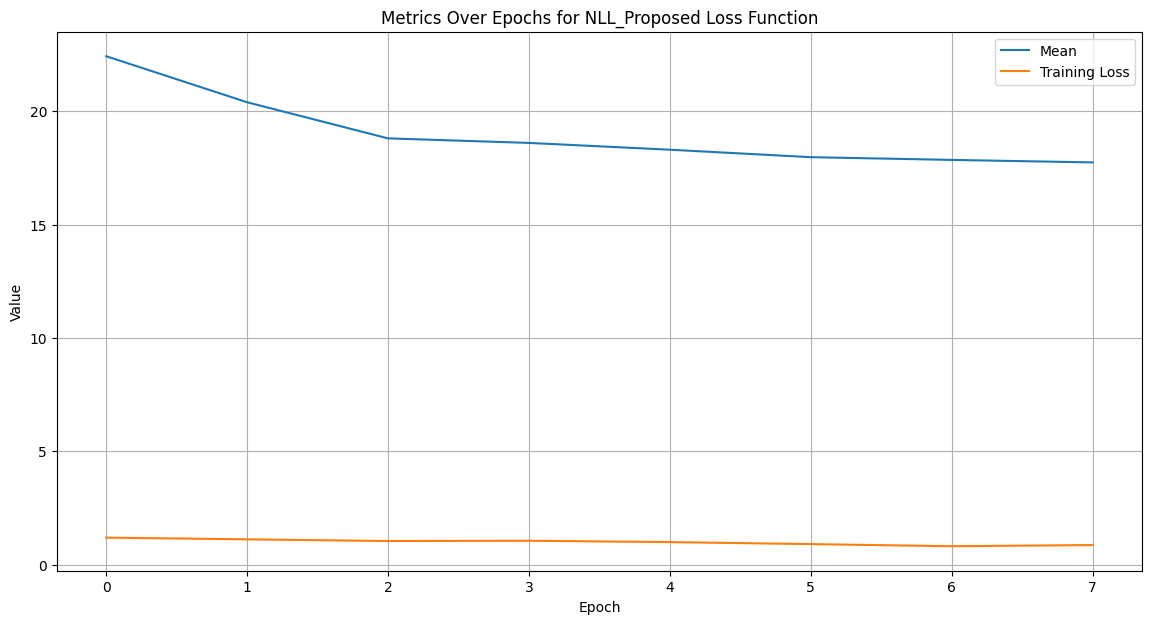

In [ ]:
def plot_metrics_over_epochs_nll_proposed(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for NLL_Proposed Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting mean and training loss over epochs for NLL_Proposed
plot_metrics_over_epochs_nll_proposed(nll_proposed_combined_corrected, ['Mean', 'Training Loss'])


In [ ]:
# Correctly loading the CSV files for the NLL_vMF loss function with appropriate column names
nll_vmf_a1 = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_a1.csv', header=None, names=columns)
nll_vmf_a2 = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_a2.csv', header=None, names=columns)
nll_vmf_a3 = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_a3.csv', header=None, names=columns)
nll_vmf_a4 = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_a4.csv', header=None, names=columns)
nll_vmf_a5 = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_a5.csv', header=None, names=columns)
nll_vmf_loss = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_loss.csv', header=None, names=columns)
nll_vmf_mean = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_mean.csv', header=None, names=columns)
nll_vmf_median = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_median.csv', header=None, names=columns)
nll_vmf_rmse = pd.read_csv('/content/sample_data/datacsv/NLL_vMF_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the NLL_vMF loss function
nll_vmf_combined_corrected = pd.DataFrame({
    'Epoch': nll_vmf_mean['Epoch'],
    'Mean': nll_vmf_mean['Value'],
    'Median': nll_vmf_median['Value'],
    'RMSE': nll_vmf_rmse['Value'],
    '5.0°': nll_vmf_a1['Value'],
    '7.5°': nll_vmf_a2['Value'],
    '11.25°': nll_vmf_a3['Value'],
    '22.5°': nll_vmf_a4['Value'],
    '30°': nll_vmf_a5['Value'],
    'Training Loss': nll_vmf_loss['Value']
})

# Display the corrected combined DataFrame for NLL_vMF
nll_vmf_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,23.400946,16.860720,30.941572,11.763961,21.288369,34.433761,61.428721,72.366551,0.970142
1,1.0,21.117887,15.354898,28.248275,14.931630,25.526488,38.461268,65.635601,76.638762,1.019542
2,2.0,19.324102,12.156087,27.005375,15.292450,29.528853,46.854967,71.799435,79.877322,0.938383
3,3.0,19.158041,12.060127,27.435855,20.141258,32.643293,47.350957,72.181293,80.176317,0.874689
4,4.0,18.305191,11.408484,26.527370,22.316907,34.966757,49.480547,73.784536,81.473442,0.792458


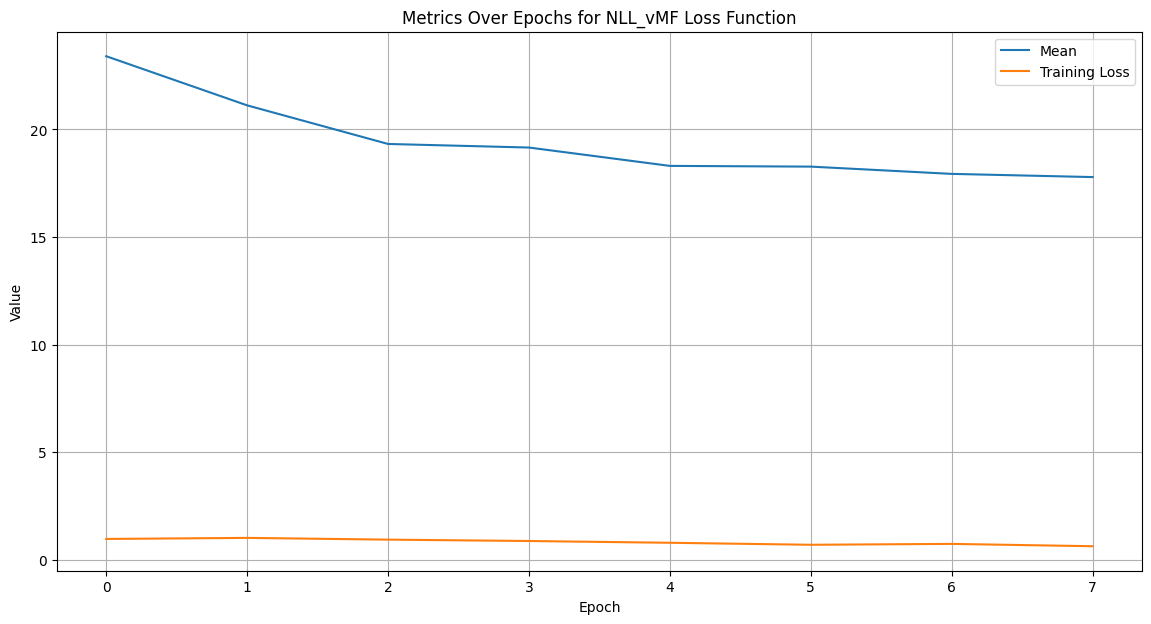

In [ ]:
def plot_metrics_over_epochs_nll_vmf(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for NLL_vMF Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting mean and training loss over epochs for NLL_vMF
plot_metrics_over_epochs_nll_vmf(nll_vmf_combined_corrected, ['Mean', 'Training Loss'])


In [ ]:
# Correctly loading the CSV files for the UG_NLL_Proposed loss function with appropriate column names
ug_nll_proposed_a1 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_a1.csv', header=None, names=columns)
ug_nll_proposed_a2 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_a2.csv', header=None, names=columns)
ug_nll_proposed_a3 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_a3.csv', header=None, names=columns)
ug_nll_proposed_a4 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_a4.csv', header=None, names=columns)
ug_nll_proposed_a5 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_a5.csv', header=None, names=columns)
ug_nll_proposed_loss = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_loss.csv', header=None, names=columns)
ug_nll_proposed_mean = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_mean.csv', header=None, names=columns)
ug_nll_proposed_median = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_median.csv', header=None, names=columns)
ug_nll_proposed_rmse = pd.read_csv('/content/sample_data/datacsv/UG_NLL_Proposed_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the UG_NLL_Proposed loss function
ug_nll_proposed_combined_corrected = pd.DataFrame({
    'Epoch': ug_nll_proposed_mean['Epoch'],
    'Mean': ug_nll_proposed_mean['Value'],
    'Median': ug_nll_proposed_median['Value'],
    'RMSE': ug_nll_proposed_rmse['Value'],
    '5.0°': ug_nll_proposed_a1['Value'],
    '7.5°': ug_nll_proposed_a2['Value'],
    '11.25°': ug_nll_proposed_a3['Value'],
    '22.5°': ug_nll_proposed_a4['Value'],
    '30°': ug_nll_proposed_a5['Value'],
    'Training Loss': ug_nll_proposed_loss['Value']
})

# Display the corrected combined DataFrame for UG_NLL_Proposed
ug_nll_proposed_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.885456,16.276299,30.490500,11.682089,21.741556,35.520533,62.932499,73.904747,3.576116
1,1.0,20.315540,12.843449,29.123172,19.173341,31.123310,45.142547,70.301891,78.897798,2.928880
2,2.0,19.616709,12.096017,28.325543,17.229355,30.428526,46.928768,72.770561,80.410261,2.712632
3,3.0,19.309269,12.308632,27.170617,12.388212,26.782992,45.857292,73.565448,81.441491,2.608588
4,4.0,17.754683,9.952123,26.947482,25.023763,39.167826,54.536455,75.870322,82.408381,2.315937


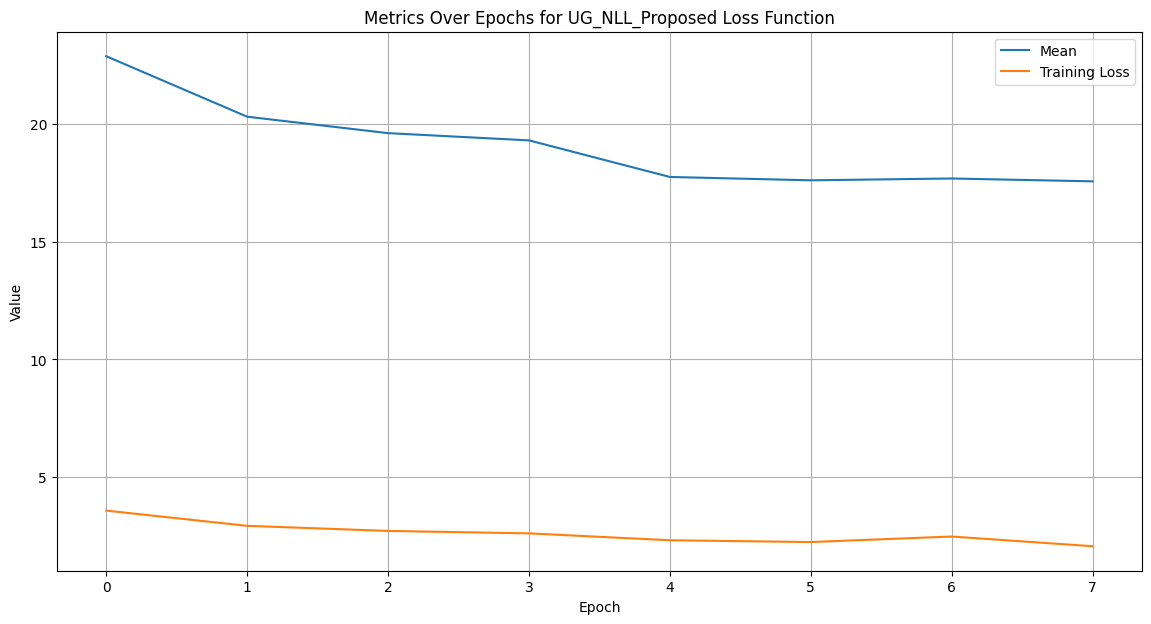

In [ ]:
def plot_metrics_over_epochs_ug_nll_proposed(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for UG_NLL_Proposed Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting mean and training loss over epochs for UG_NLL_Proposed
plot_metrics_over_epochs_ug_nll_proposed(ug_nll_proposed_combined_corrected, ['Mean', 'Training Loss'])


In [ ]:
# Correctly loading the CSV files for the UG_NLL_vMF loss function with appropriate column names
ug_nll_vmf_a1 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_a1.csv', header=None, names=columns)
ug_nll_vmf_a2 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_a2.csv', header=None, names=columns)
ug_nll_vmf_a3 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_a3.csv', header=None, names=columns)
ug_nll_vmf_a4 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_a4.csv', header=None, names=columns)
ug_nll_vmf_a5 = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_a5.csv', header=None, names=columns)
ug_nll_vmf_loss = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_loss.csv', header=None, names=columns)
ug_nll_vmf_mean = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_mean.csv', header=None, names=columns)
ug_nll_vmf_median = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_median.csv', header=None, names=columns)
ug_nll_vmf_rmse = pd.read_csv('/content/sample_data/datacsv/UG_NLL_vMF_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the UG_NLL_vMF loss function
ug_nll_vmf_combined_corrected = pd.DataFrame({
    'Epoch': ug_nll_vmf_mean['Epoch'],
    'Mean': ug_nll_vmf_mean['Value'],
    'Median': ug_nll_vmf_median['Value'],
    'RMSE': ug_nll_vmf_rmse['Value'],
    '5.0°': ug_nll_vmf_a1['Value'],
    '7.5°': ug_nll_vmf_a2['Value'],
    '11.25°': ug_nll_vmf_a3['Value'],
    '22.5°': ug_nll_vmf_a4['Value'],
    '30°': ug_nll_vmf_a5['Value'],
    'Training Loss': ug_nll_vmf_loss['Value']
})

# Display the corrected combined DataFrame for UG_NLL_vMF
ug_nll_vmf_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.955105,16.535887,30.131127,9.329841,19.500271,34.032746,62.545810,73.632592,3.848878
1,1.0,21.030064,14.839932,28.185641,13.984967,24.723375,38.866170,66.900119,76.926381,3.182580
2,2.0,19.084204,12.259482,26.840407,17.722767,30.807450,46.592509,72.157340,80.422842,2.856975
3,3.0,19.247332,12.115135,27.618267,17.928414,30.783770,46.927904,72.884891,80.728652,2.857433
4,4.0,18.525713,11.346074,26.562663,16.041650,31.665479,49.642685,74.268460,81.864613,2.424791


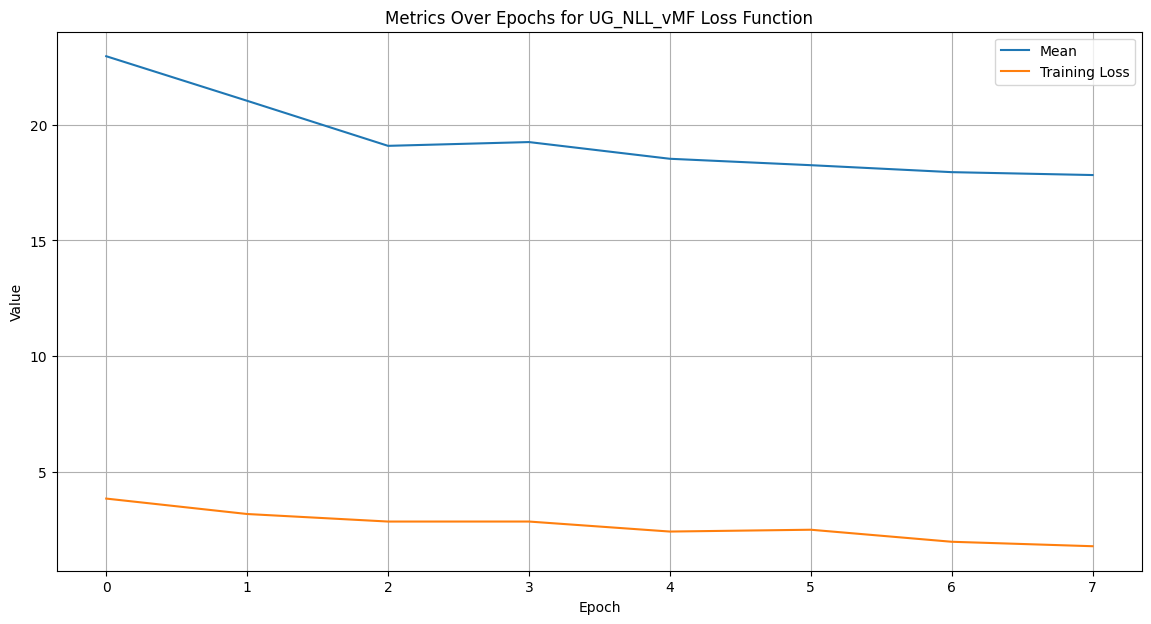

In [ ]:
def plot_metrics_over_epochs_ug_nll_vmf(data, metric_names):
    plt.figure(figsize=(14, 7))
    for metric in metric_names:
        plt.plot(data['Epoch'], data[metric], label=metric)

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Metrics Over Epochs for UG_NLL_vMF Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting mean and training loss over epochs for UG_NLL_vMF
plot_metrics_over_epochs_ug_nll_vmf(ug_nll_vmf_combined_corrected, ['Mean', 'Training Loss'])


In [ ]:

wrappedcauchy_a1 = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_a1.csv', header=None, names=columns)
wrappedcauchy_a2 = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_a2.csv', header=None, names=columns)
wrappedcauchy_a3 = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_a3.csv', header=None, names=columns)
wrappedcauchy_a4 = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_a4.csv', header=None, names=columns)
wrappedcauchy_a5 = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_a5.csv', header=None, names=columns)
wrappedcauchy_loss = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_loss.csv', header=None, names=columns)
wrappedcauchy_mean = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_mean.csv', header=None, names=columns)
wrappedcauchy_median = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_median.csv', header=None, names=columns)
wrappedcauchy_rmse = pd.read_csv('/content/sample_data/datacsv/wrappedcauchy_rmse.csv', header=None, names=columns)

# Combining the values into a single DataFrame for the WrappedCauchy loss function
wrappedcauchy_combined_corrected = pd.DataFrame({
    'Epoch': wrappedcauchy_mean['Epoch'],
    'Mean': wrappedcauchy_mean['Value'],
    'Median': wrappedcauchy_median['Value'],
    'RMSE': wrappedcauchy_rmse['Value'],
    '5.0°': wrappedcauchy_a1['Value'],
    '7.5°': wrappedcauchy_a2['Value'],  # Placeholder value
    '11.25°': wrappedcauchy_a3['Value'],
    '22.5°': wrappedcauchy_a4['Value'],
    '30°': wrappedcauchy_a5['Value'],
    'Training Loss': wrappedcauchy_loss['Value']
})

# Display the corrected combined DataFrame for WrappedCauchy
wrappedcauchy_combined_corrected.head()


,Epoch,Mean,Median,RMSE,5.0°,7.5°,11.25°,22.5°,30°,Training Loss
0,0.0,22.618366,14.947927,31.411423,15.056465,25.909720,39.644096,65.111251,74.870813,1.629235
1,1.0,20.613216,13.381524,28.836179,13.937737,26.706744,42.940691,70.007288,78.880690,1.572055
2,2.0,18.967255,11.623729,27.728196,20.967214,33.837456,48.754406,73.362674,81.030341,1.454945
3,3.0,18.544579,11.227509,27.249241,21.925567,35.189170,50.074049,74.052805,81.607234,1.476572
4,4.0,18.021477,10.624139,26.808875,23.543727,37.009352,52.108540,75.068299,82.149829,1.459477


ValueError: x and y must have same first dimension, but have shapes (9900,) and (9950,)

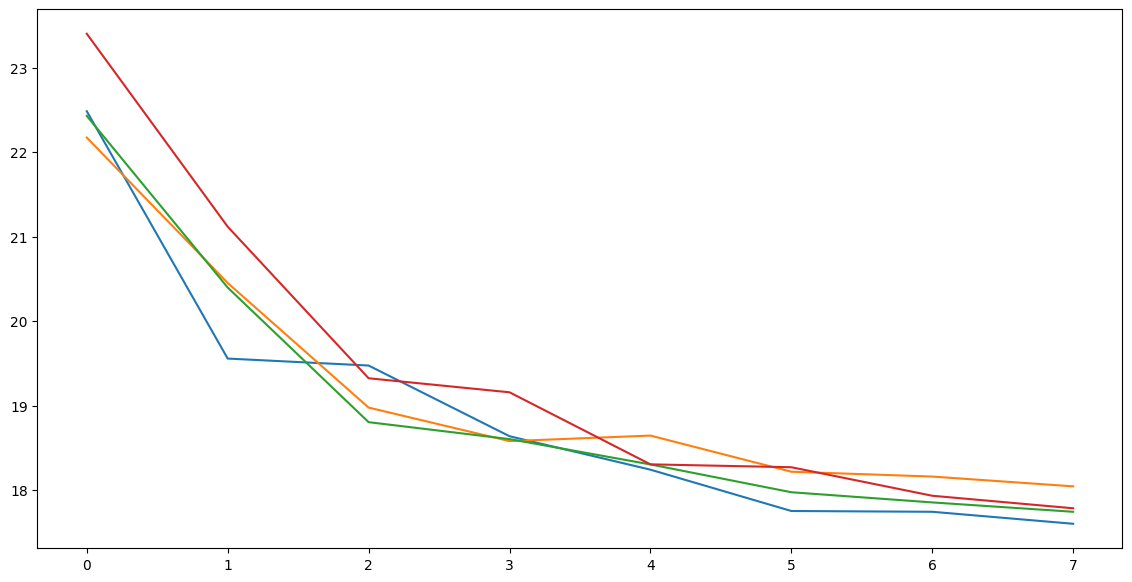

In [ ]:
import matplotlib.pyplot as plt

# Assuming all the dataframes have the same number of epochs and are aligned properly
epochs = wrappedcauchy_combined_corrected['Epoch']

# Prepare data for plotting
mean_values = {
    'AL': al_combined_corrected['Mean'],
    'L2': l2_combined_corrected['Mean'],
    'NLL_Proposed': nll_proposed_combined_corrected['Mean'],
    'NLL_vMF': nll_vmf_combined_corrected['Mean'],
    'UG_NLL_Proposed': ug_nll_proposed_combined_corrected['Mean'],
    'UG_NLL_vMF': ug_nll_vmf_combined_corrected['Mean'],
    'WrappedCauchy': wrappedcauchy_combined_corrected['Mean']
}

# Plotting
plt.figure(figsize=(14, 7))
for label, values in mean_values.items():
    plt.plot(epochs, values, label=label)

plt.xlabel('Epoch')
plt.ylabel('Mean Error')
plt.title('Comparative Analysis of Loss Functions (Mean Error)')
plt.legend()
plt.grid(True)
plt.show()

# Similar plotting can be done for other metrics like Median, RMSE, Training Loss etc. by adapting the above code.


# Find the minimum length among all datasets to ensure alignment for plotting
min_length = min(len(value) for value in mean_values.values())

# Trimming the datasets to the minimum length for alignment
for key in mean_values.keys():
    mean_values[key] = mean_values[key][:min_length]

# Redefining epochs for alignment based on the minimum length found
epochs_aligned = epochs[:min_length]

# Plotting again with the corrected alignment
plt.figure(figsize=(14, 7))
for label, values in mean_values.items():
    plt.plot(epochs_aligned, values, label=label)

plt.xlabel('Epoch')
plt.ylabel('Mean Error')
plt.title('Comparative Analysis of Loss Functions (Mean Error)')
plt.legend()
plt.grid(True)
plt.show()


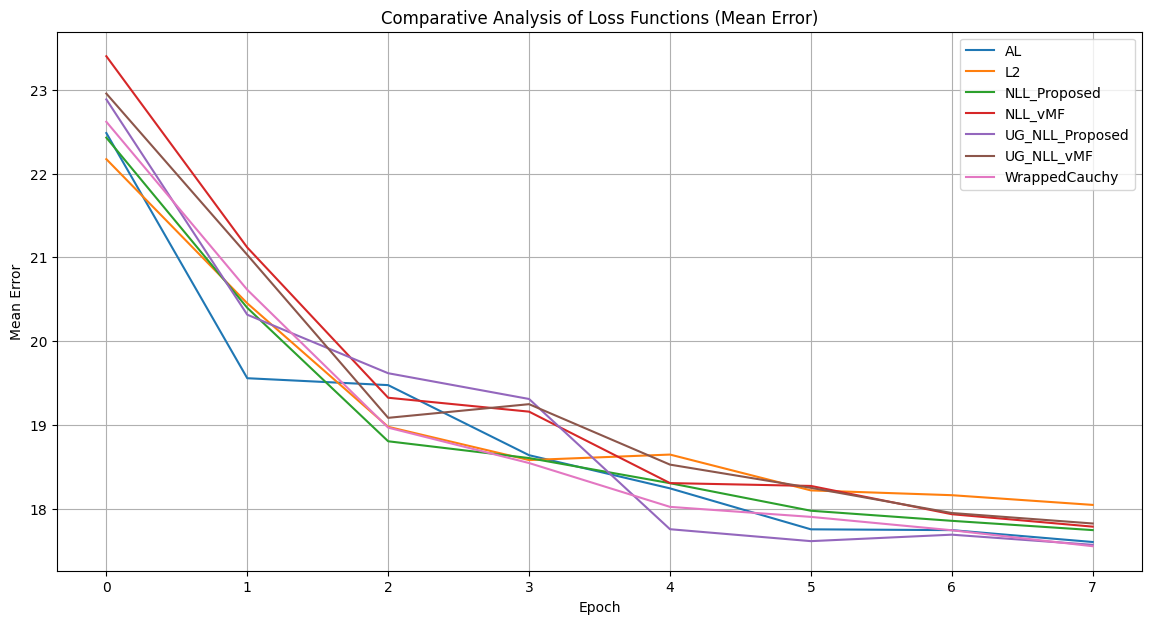

In [ ]:
# Find the minimum length among all datasets to ensure alignment for plotting
min_length = min(len(value) for value in mean_values.values())

# Trimming the datasets to the minimum length for alignment
for key in mean_values.keys():
    mean_values[key] = mean_values[key][:min_length]

# Redefining epochs for alignment based on the minimum length found
epochs_aligned = epochs[:min_length]

# Plotting again with the corrected alignment
plt.figure(figsize=(14, 7))
for label, values in mean_values.items():
    plt.plot(epochs_aligned, values, label=label)

plt.xlabel('Epoch')
plt.ylabel('Mean Error')
plt.title('Comparative Analysis of Loss Functions (Mean Error)')
plt.legend()
plt.grid(True)
plt.show()


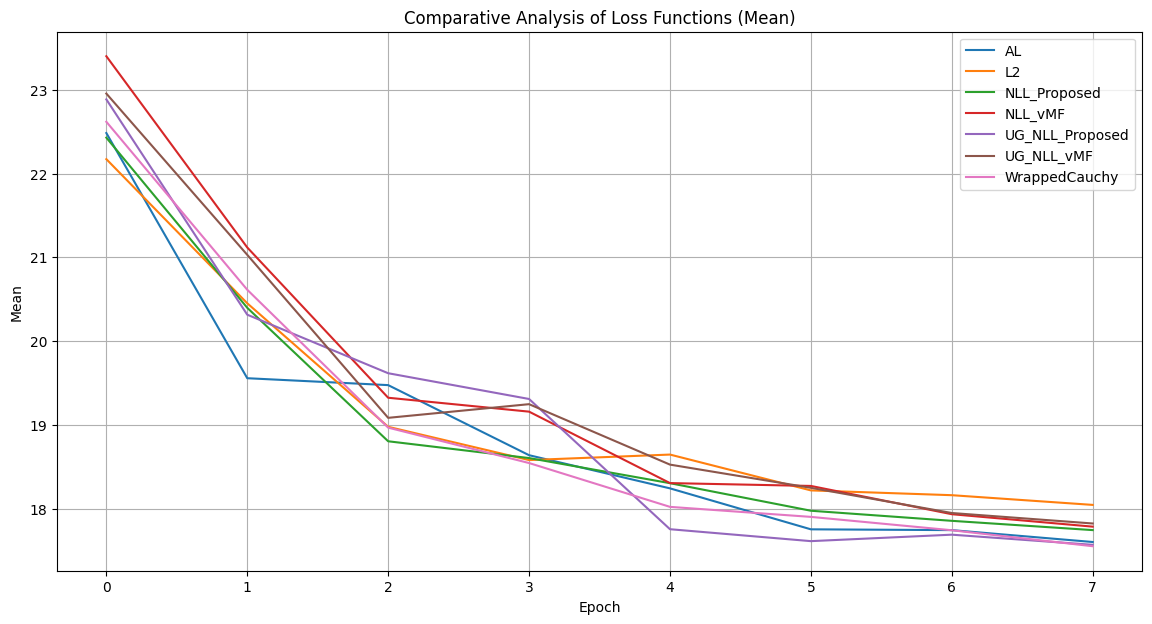

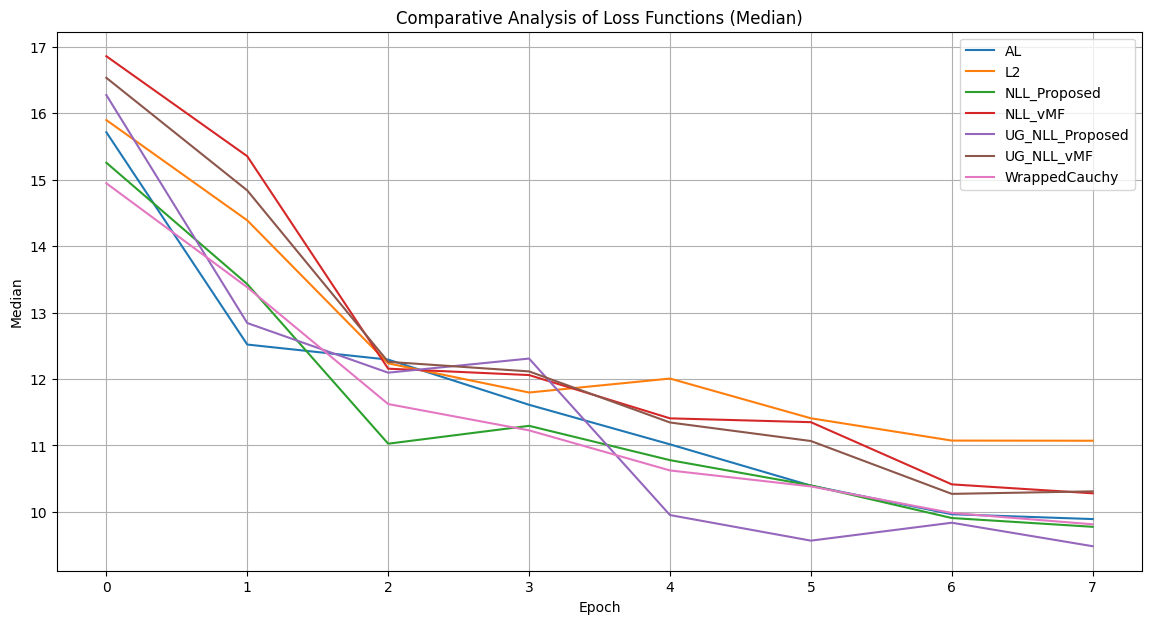

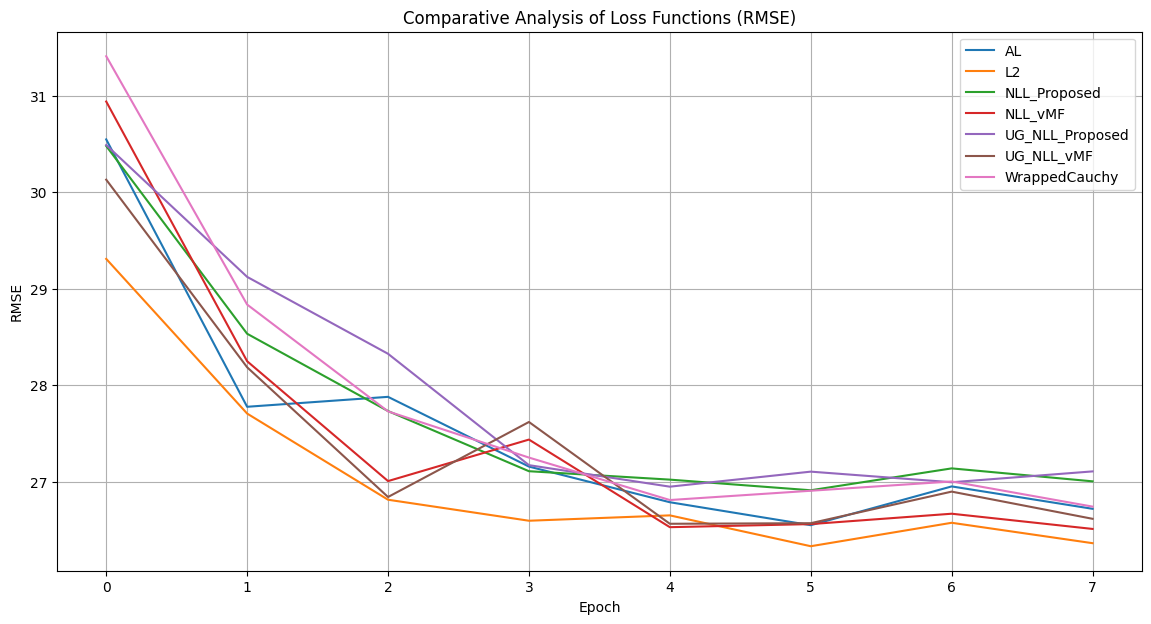

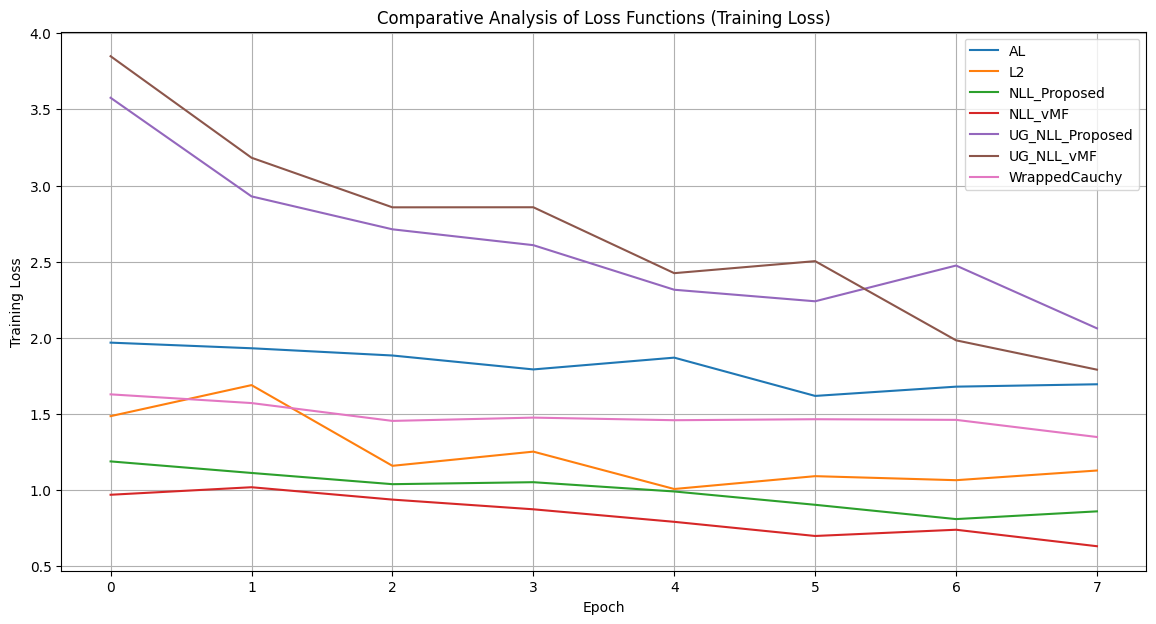

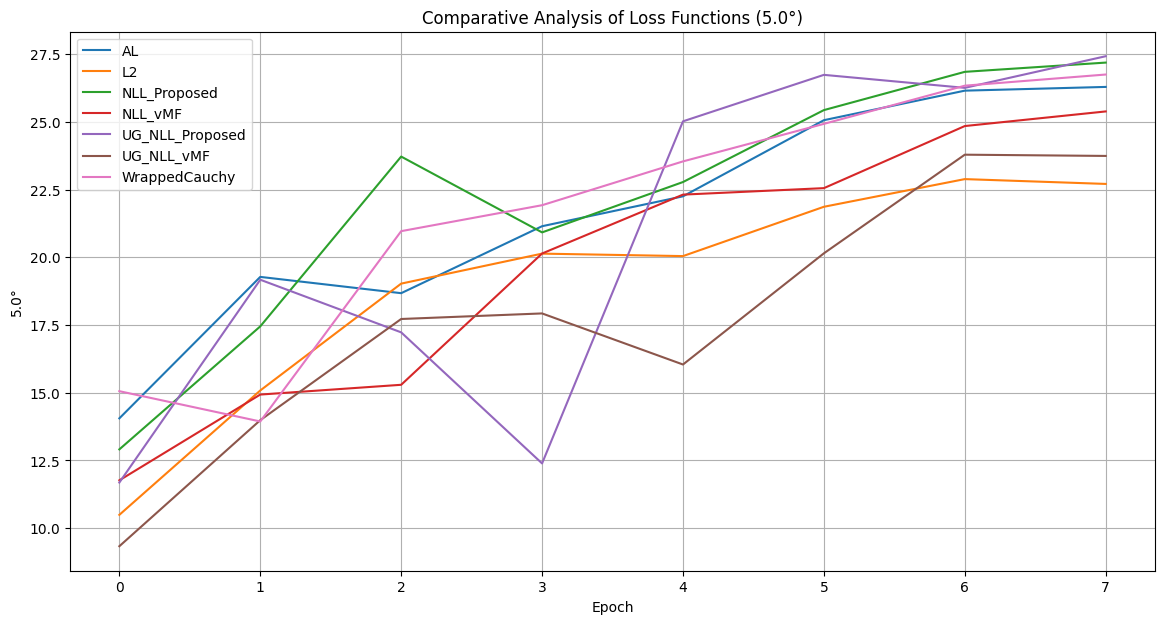

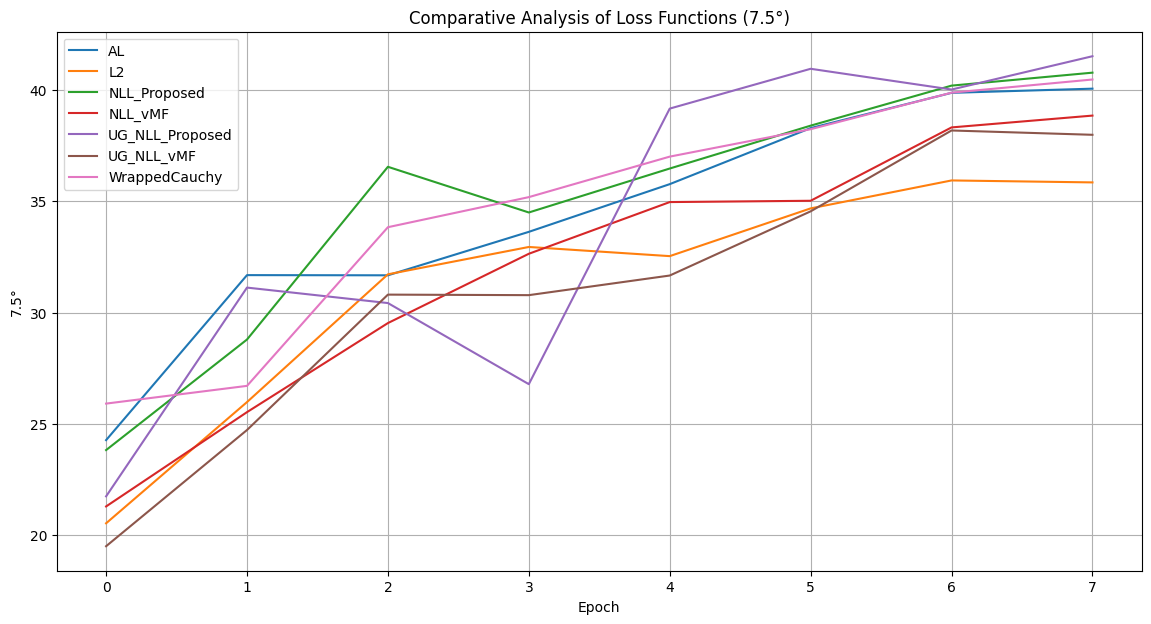

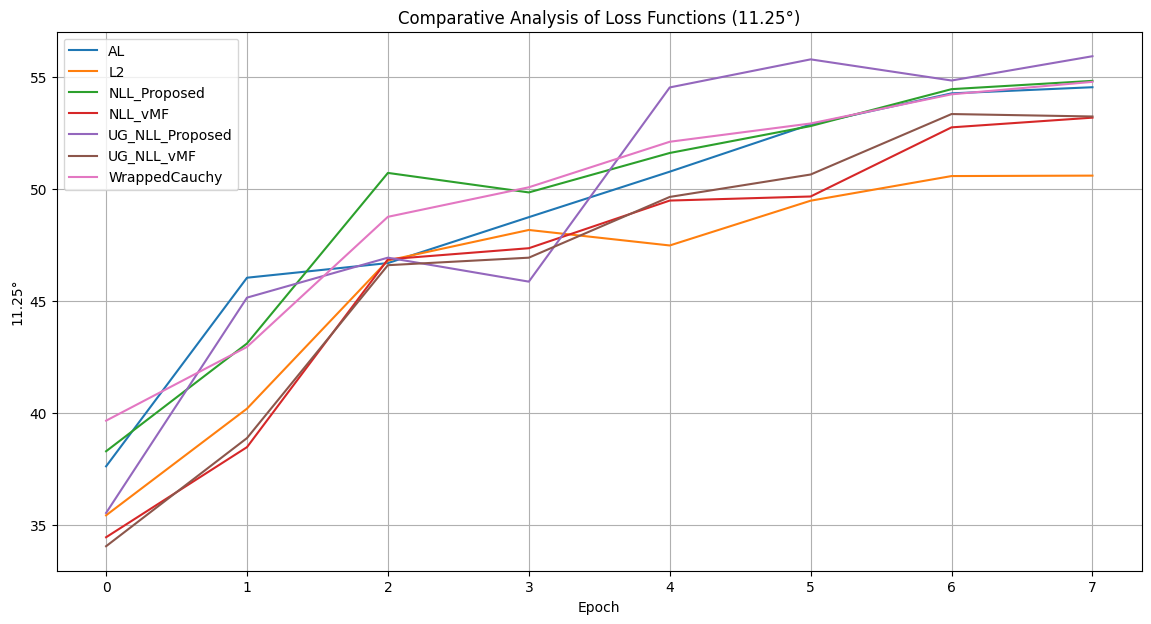

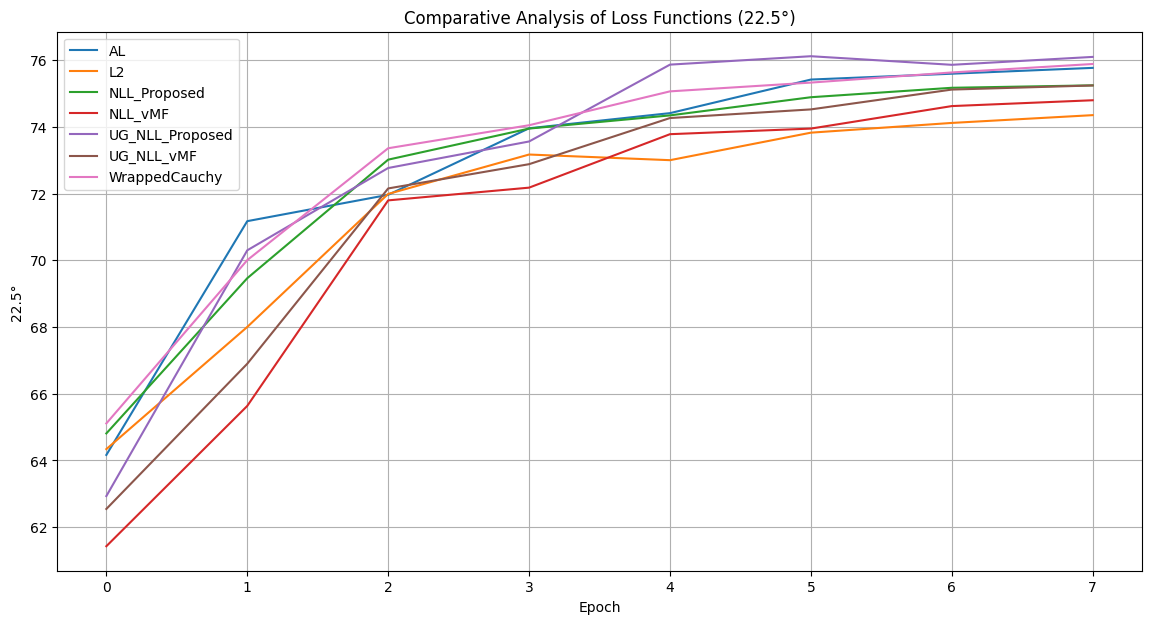

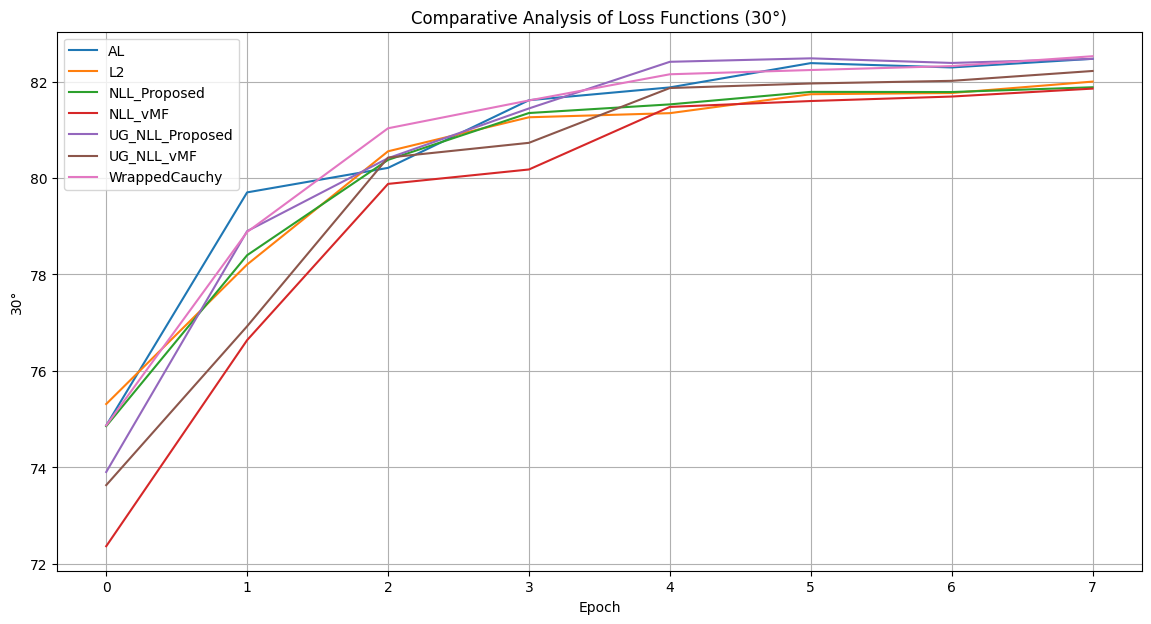

In [ ]:
# Prepare data for plotting other metrics
metrics = {
    'Mean': {
        'AL': al_combined_corrected['Mean'],
        'L2': l2_combined_corrected['Mean'],
        'NLL_Proposed': nll_proposed_combined_corrected['Mean'],
        'NLL_vMF': nll_vmf_combined_corrected['Mean'],
        'UG_NLL_Proposed': ug_nll_proposed_combined_corrected['Mean'],
        'UG_NLL_vMF': ug_nll_vmf_combined_corrected['Mean'],
        'WrappedCauchy': wrappedcauchy_combined_corrected['Mean']
    },
    'Median': {
        'AL': al_combined_corrected['Median'],
        'L2': l2_combined_corrected['Median'],
        'NLL_Proposed': nll_proposed_combined_corrected['Median'],
        'NLL_vMF': nll_vmf_combined_corrected['Median'],
        'UG_NLL_Proposed': ug_nll_proposed_combined_corrected['Median'],
        'UG_NLL_vMF': ug_nll_vmf_combined_corrected['Median'],
        'WrappedCauchy': wrappedcauchy_combined_corrected['Median']
    },
    'RMSE': {
        'AL': al_combined_corrected['RMSE'],
        'L2': l2_combined_corrected['RMSE'],
        'NLL_Proposed': nll_proposed_combined_corrected['RMSE'],
        'NLL_vMF': nll_vmf_combined_corrected['RMSE'],
        'UG_NLL_Proposed': ug_nll_proposed_combined_corrected['RMSE'],
        'UG_NLL_vMF': ug_nll_vmf_combined_corrected['RMSE'],
        'WrappedCauchy': wrappedcauchy_combined_corrected['RMSE']
    },
    'Training Loss': {
        'AL': al_combined_corrected['Training Loss'],
        'L2': l2_combined_corrected['Training Loss'],
        'NLL_Proposed': nll_proposed_combined_corrected['Training Loss'],
        'NLL_vMF': nll_vmf_combined_corrected['Training Loss'],
        'UG_NLL_Proposed': ug_nll_proposed_combined_corrected['Training Loss'],
        'UG_NLL_vMF': ug_nll_vmf_combined_corrected['Training Loss'],
        'WrappedCauchy': wrappedcauchy_combined_corrected['Training Loss']
    }
}

pgp_degrees = ['5.0°', '7.5°', '11.25°', '22.5°', '30°']
for degree in pgp_degrees:
    metrics[degree] = {
        'AL': al_combined_corrected[degree],
        'L2': l2_combined_corrected[degree],
        'NLL_Proposed': nll_proposed_combined_corrected[degree],
        'NLL_vMF': nll_vmf_combined_corrected[degree],
        'UG_NLL_Proposed': ug_nll_proposed_combined_corrected[degree],
        'UG_NLL_vMF': ug_nll_vmf_combined_corrected[degree],
        'WrappedCauchy': wrappedcauchy_combined_corrected[degree]
    }

# Plotting all metrics
for metric, data in metrics.items():
    plt.figure(figsize=(14, 7))
    for label, values in data.items():
        values_trimmed = values[:min_length]  # Ensuring alignment
        plt.plot(epochs_aligned, values_trimmed, label=label)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'Comparative Analysis of Loss Functions ({metric})')
    plt.legend()
    plt.grid(True)

    # Save the figure as a PDF file
    filename = f'{metric}_Comparative_Analysis.pdf'.replace('°', 'deg')  # Replace '°' to avoid filename issues
    plt.savefig(filename, format='pdf')


    plt.show()


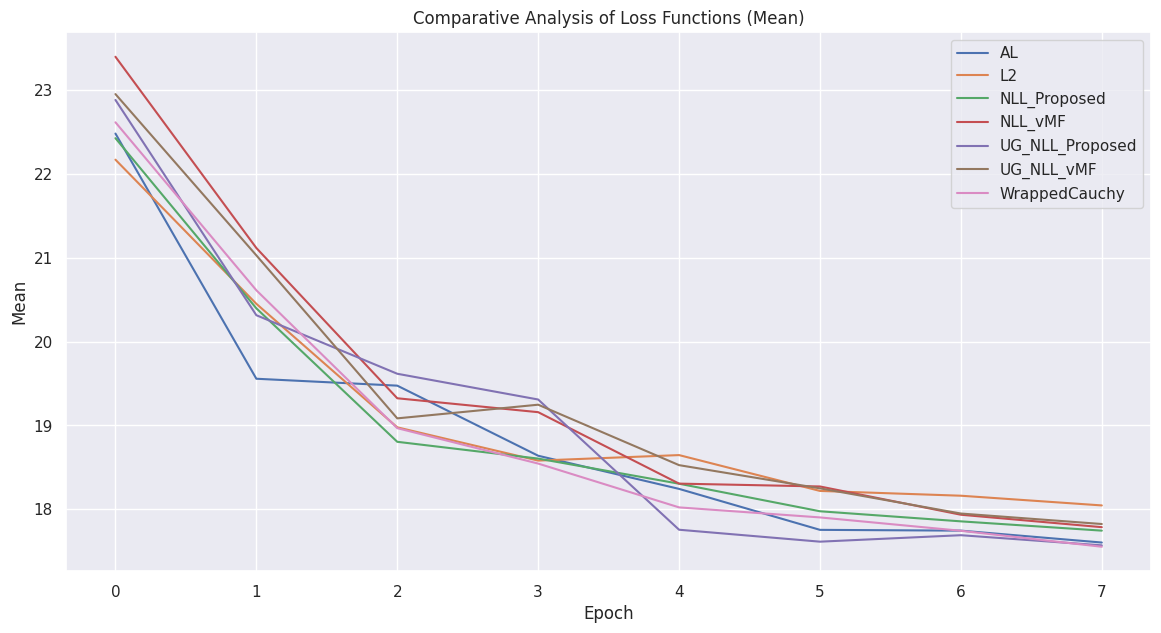

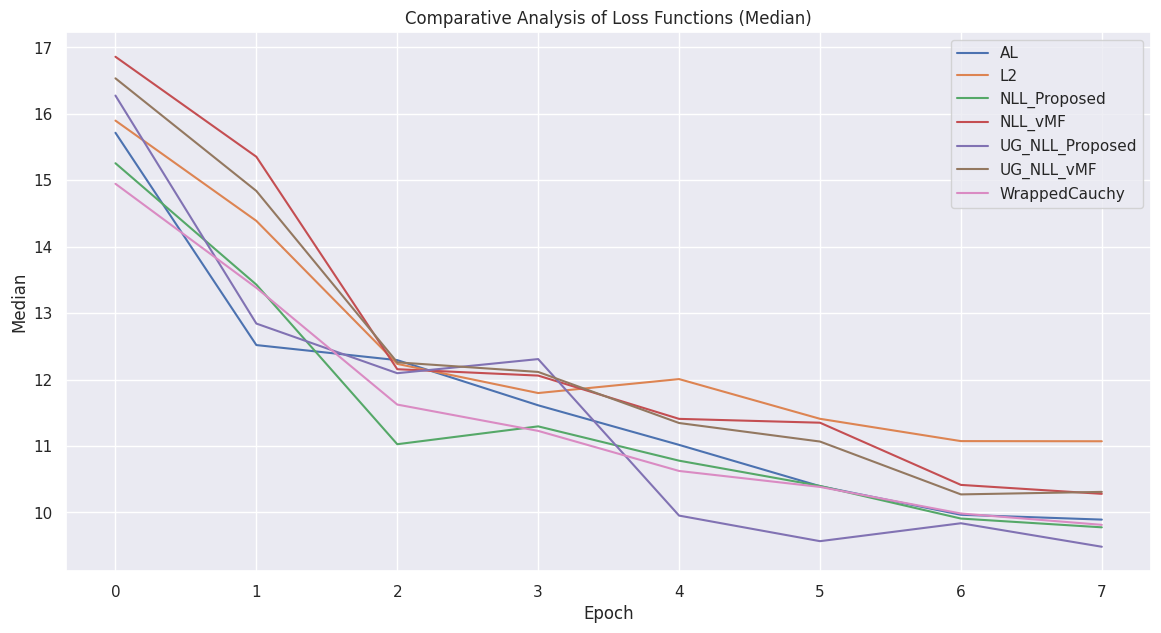

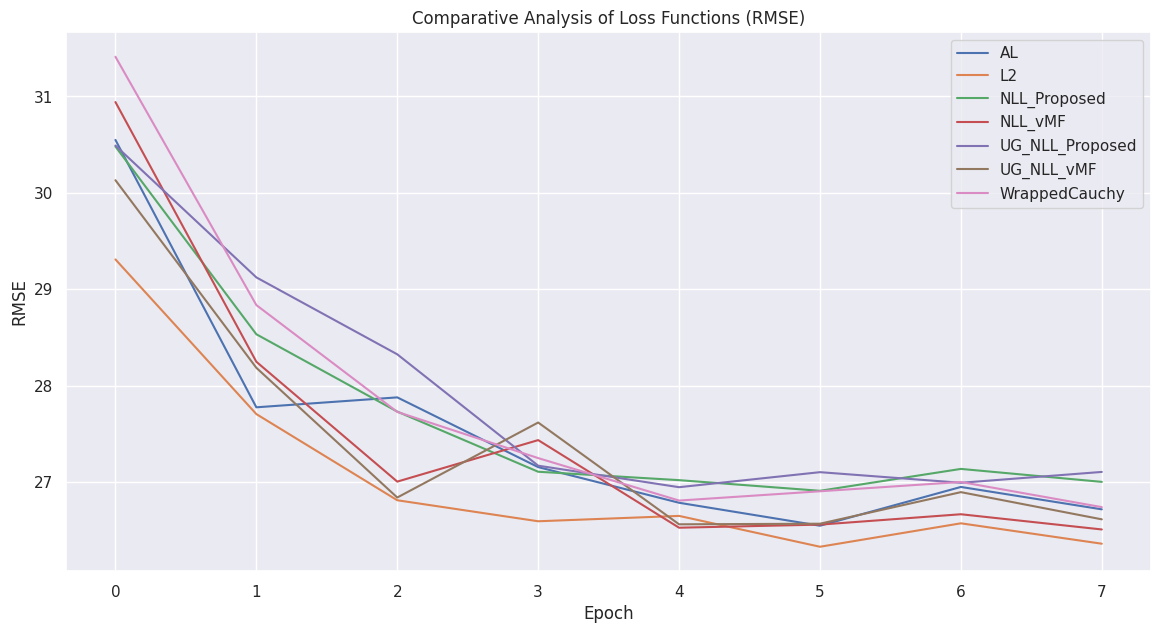

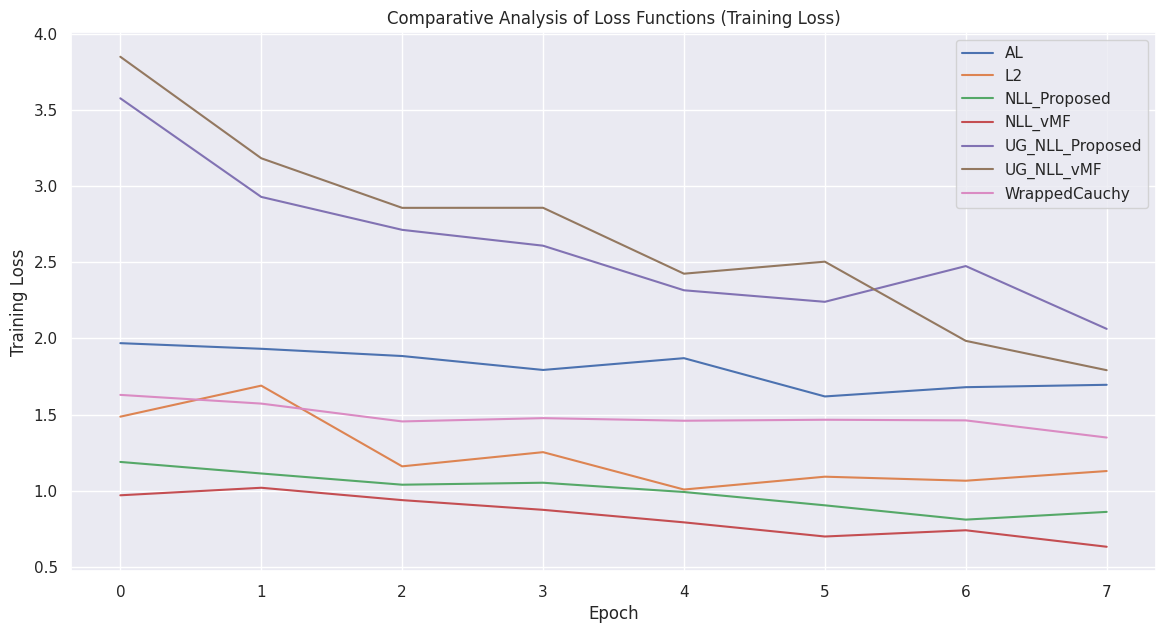

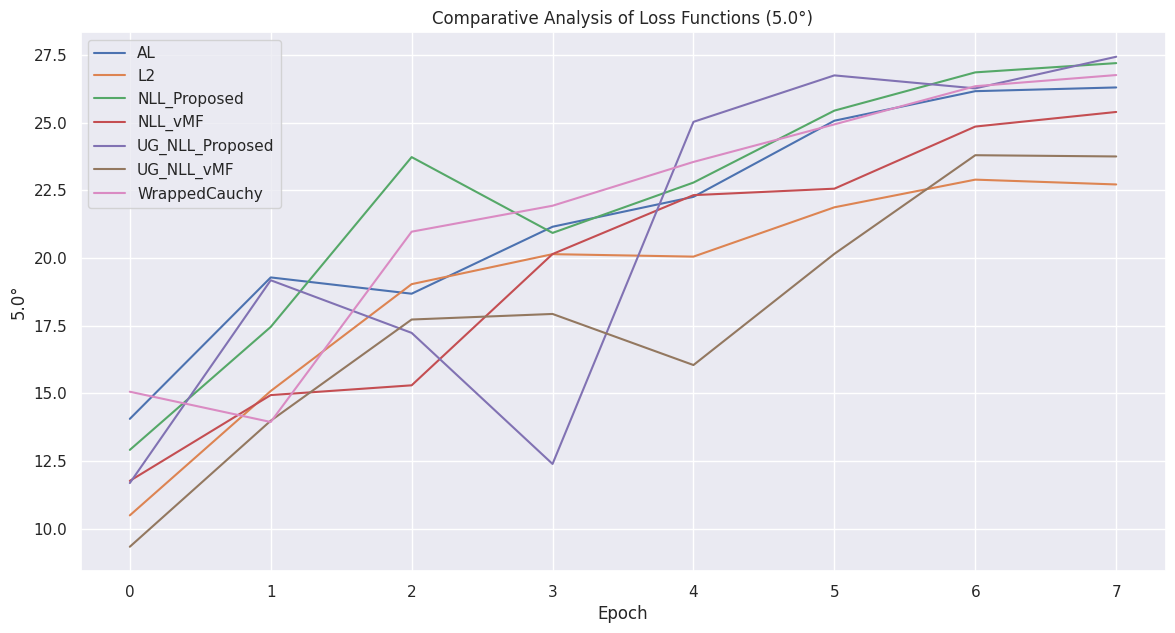

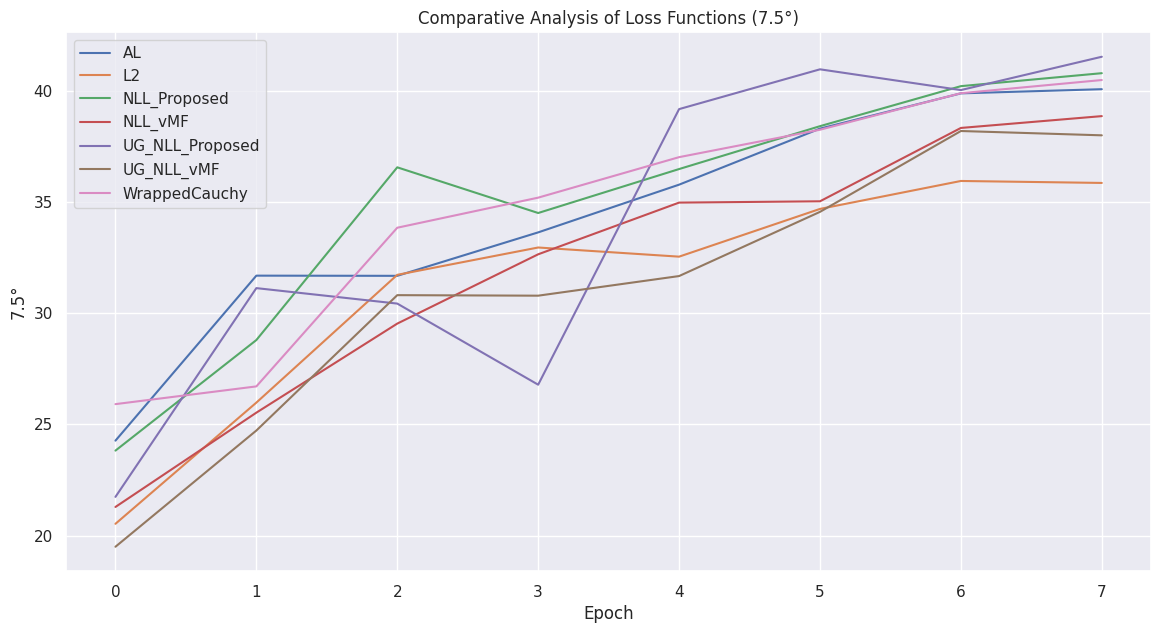

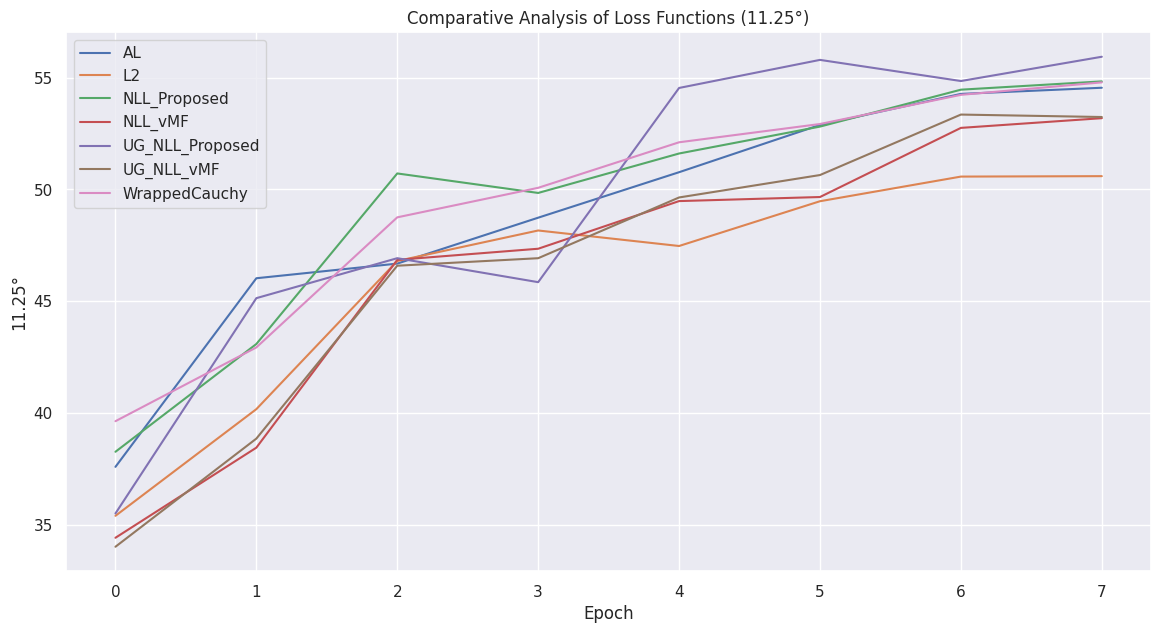

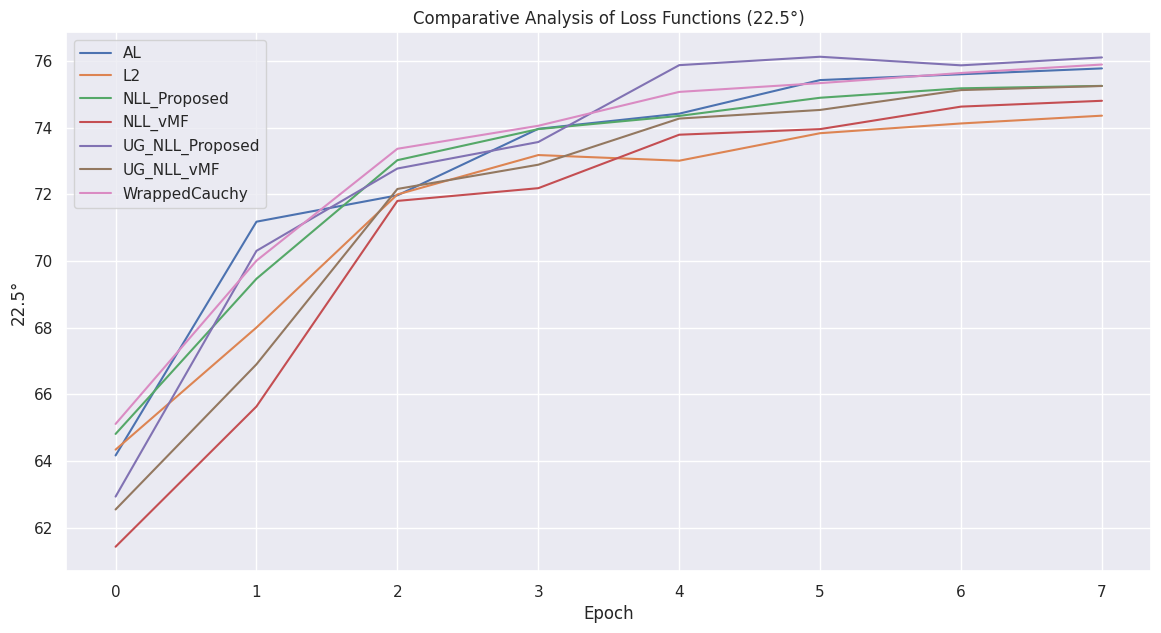

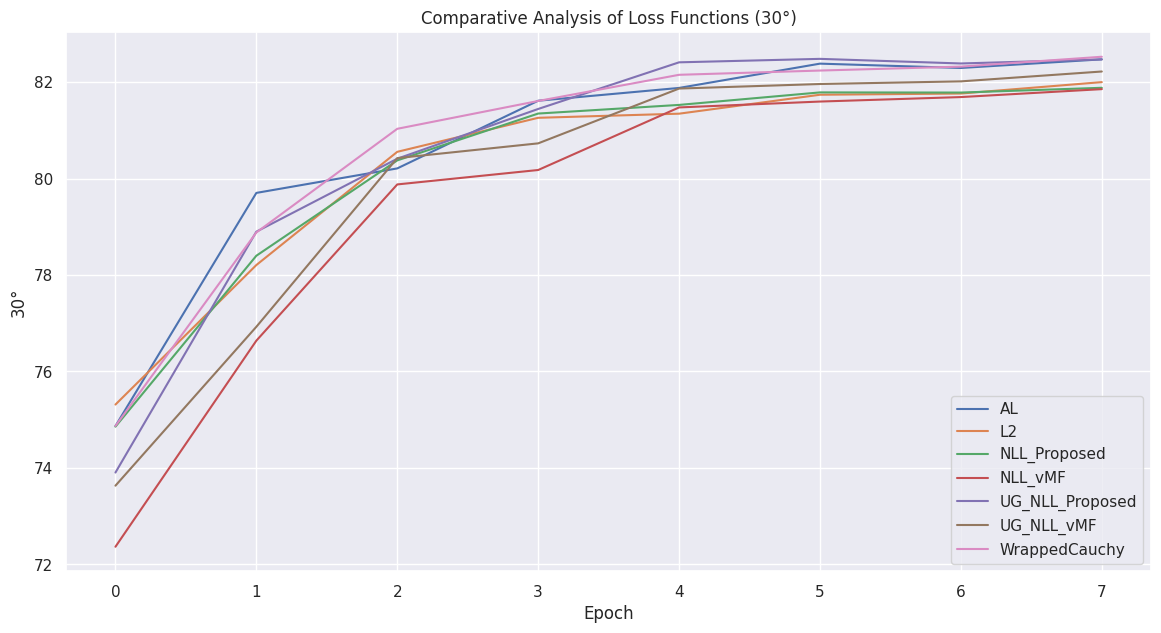

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme for beautifying the plots
sns.set_theme(style="darkgrid")

for metric, data in metrics.items():
    plt.figure(figsize=(14, 7))

    # Use Seaborn's color palette
    palette = sns.color_palette("deep", len(data))

    for (label, values), color in zip(data.items(), palette):
        values_trimmed = values[:min_length]  # Ensuring alignment
        plt.plot(epochs_aligned, values_trimmed, label=label, color=color)

    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'Comparative Analysis of Loss Functions ({metric})')
    plt.legend()

    # Save the figure as a PDF file
    filename = f'{metric}_seaborn.pdf'.replace('°', 'deg')  # Replace '°' to avoid filename issues
    plt.savefig(filename, format='pdf')

    plt.show()


In [ ]:
# Find the minimum length across all datasets for consistent plotting
min_length = min(
    len(al_combined_corrected),
    len(l2_combined_corrected),
    len(nll_proposed_combined_corrected),
    len(nll_vmf_combined_corrected),
    len(ug_nll_proposed_combined_corrected),
    len(ug_nll_vmf_combined_corrected),
    len(wrappedcauchy_combined_corrected)
)

# Function to trim datasets to the minimum length for consistency
def trim_to_min_length(df):
    return df.head(min_length)

# Trim all datasets
datasets = [al_combined_corrected, l2_combined_corrected, nll_proposed_combined_corrected, nll_vmf_combined_corrected,
            ug_nll_proposed_combined_corrected, ug_nll_vmf_combined_corrected, wrappedcauchy_combined_corrected]
trimmed_datasets = [trim_to_min_length(df) for df in datasets]


In [ ]:

import matplotlib.pyplot as plt

def plot_metric_across_loss_functions(metric_name):
    plt.figure(figsize=(14, 7))
    labels = ['AL', 'L2', 'NLL_Proposed', 'NLL_vMF', 'UG_NLL_Proposed', 'UG_NLL_vMF', 'WrappedCauchy']

    for df, label in zip(trimmed_datasets, labels):
        plt.plot(df['Epoch'], df[metric_name], label=label)

    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Across Loss Functions')
    plt.legend()
    plt.grid(True)
    plt.show()


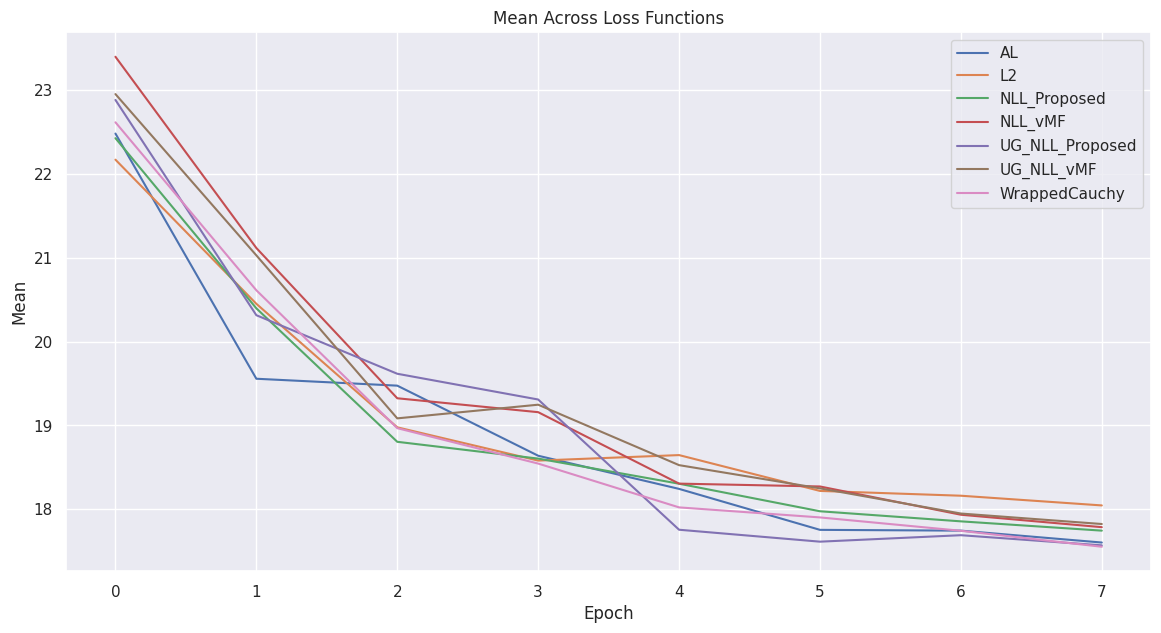

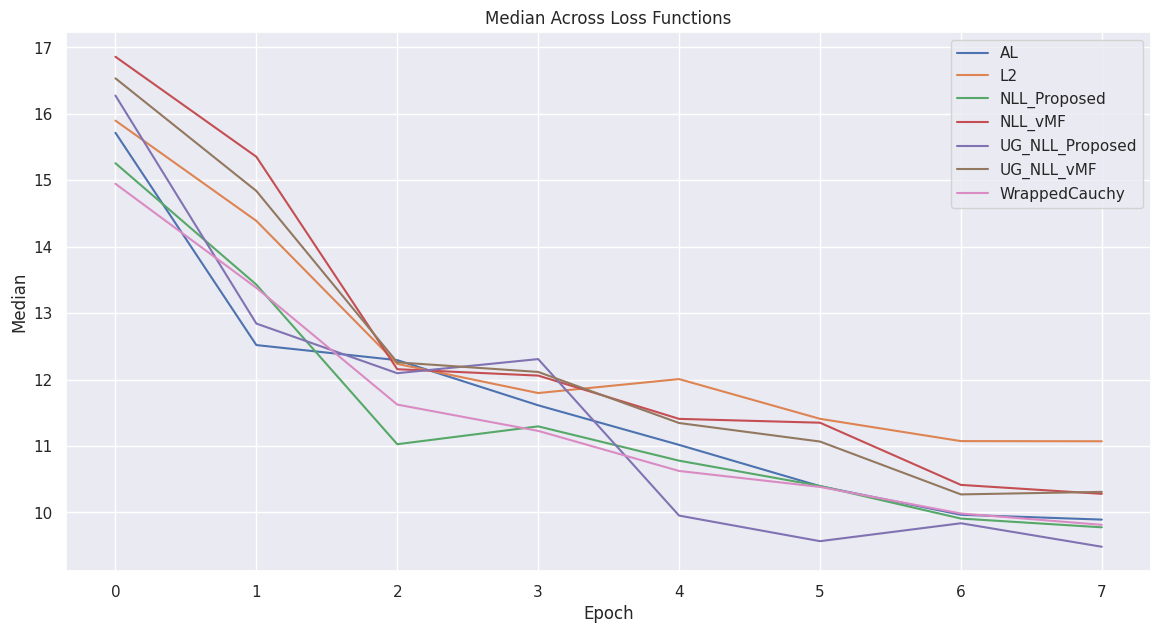

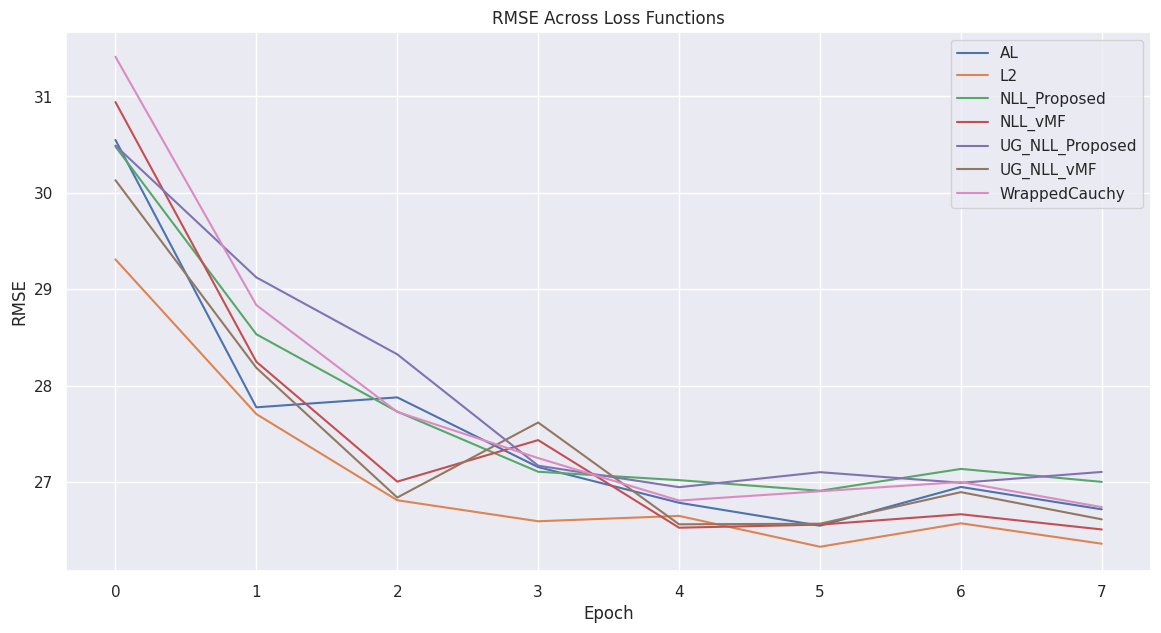

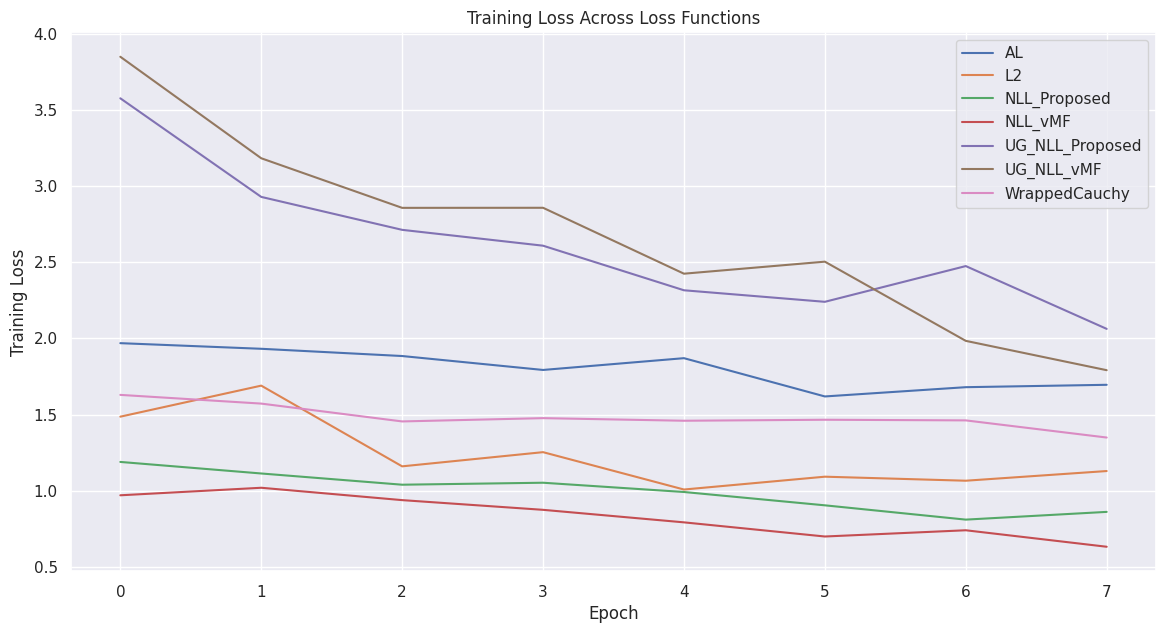

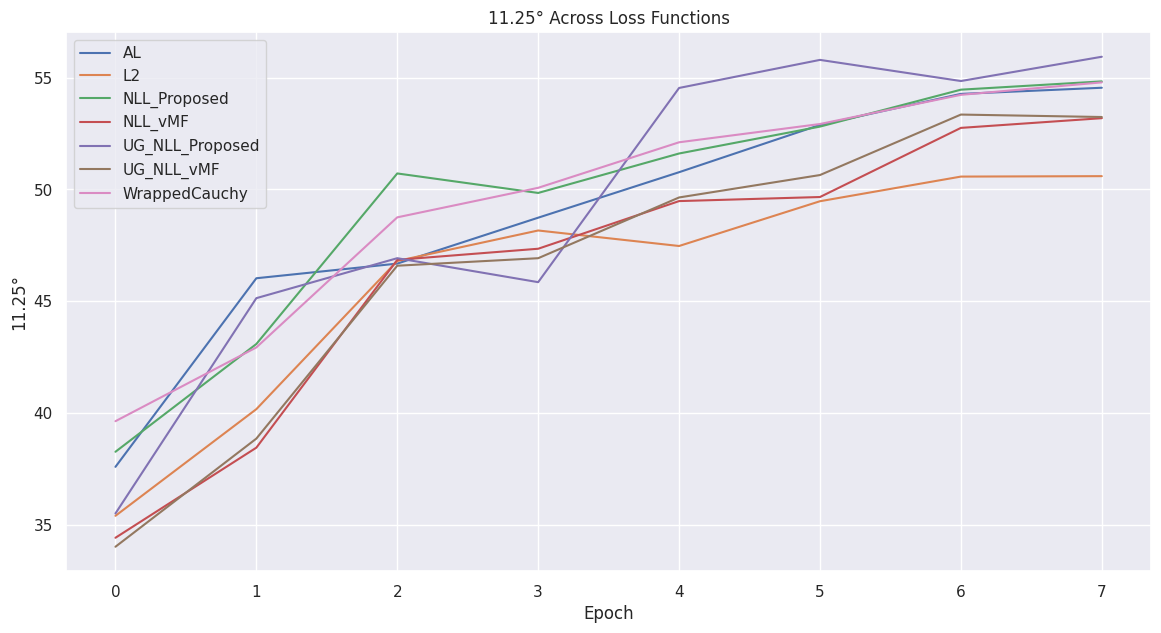

In [ ]:
# Plot Mean Error Across Loss Functions
plot_metric_across_loss_functions('Mean')

# Plot Median Error Across Loss Functions
plot_metric_across_loss_functions('Median')

# Plot RMSE Across Loss Functions
plot_metric_across_loss_functions('RMSE')

# Plot Training Loss Across Loss Functions
plot_metric_across_loss_functions('Training Loss')

# Example for plotting PGP for a specific threshold (e.g., 11.25°)
plot_metric_across_loss_functions('11.25°')
